**Sobel**

In [50]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
Created on 22 May 2019

@author: M Roux
"""

import math
import numpy as np
import matplotlib.pyplot as plt
import skimage as sk

from scipy import ndimage
from scipy import signal

from skimage import io

from skimage import filters


##############################################

import mrlab as mr

In [51]:
import tempfile
import IPython

def viewimage(im, normalize=True,titre='',displayfilename=False):
    imin=im.copy().astype(np.float32)
    if normalize:
        imin-=imin.min()
        if imin.max()>0:
            imin/=imin.max()
    else:
        imin=imin.clip(0,255)/255
        
    
    imin=(imin*255).astype(np.uint8)
    filename=tempfile.mktemp(titre+'.png')
    if displayfilename:
        print (filename)
    plt.imsave(filename, imin, cmap='gray')
    IPython.display.display(IPython.display.Image(filename))

In [52]:
ima=io.imread('cell.tif')
sigma=0
seuilnorme=0.1

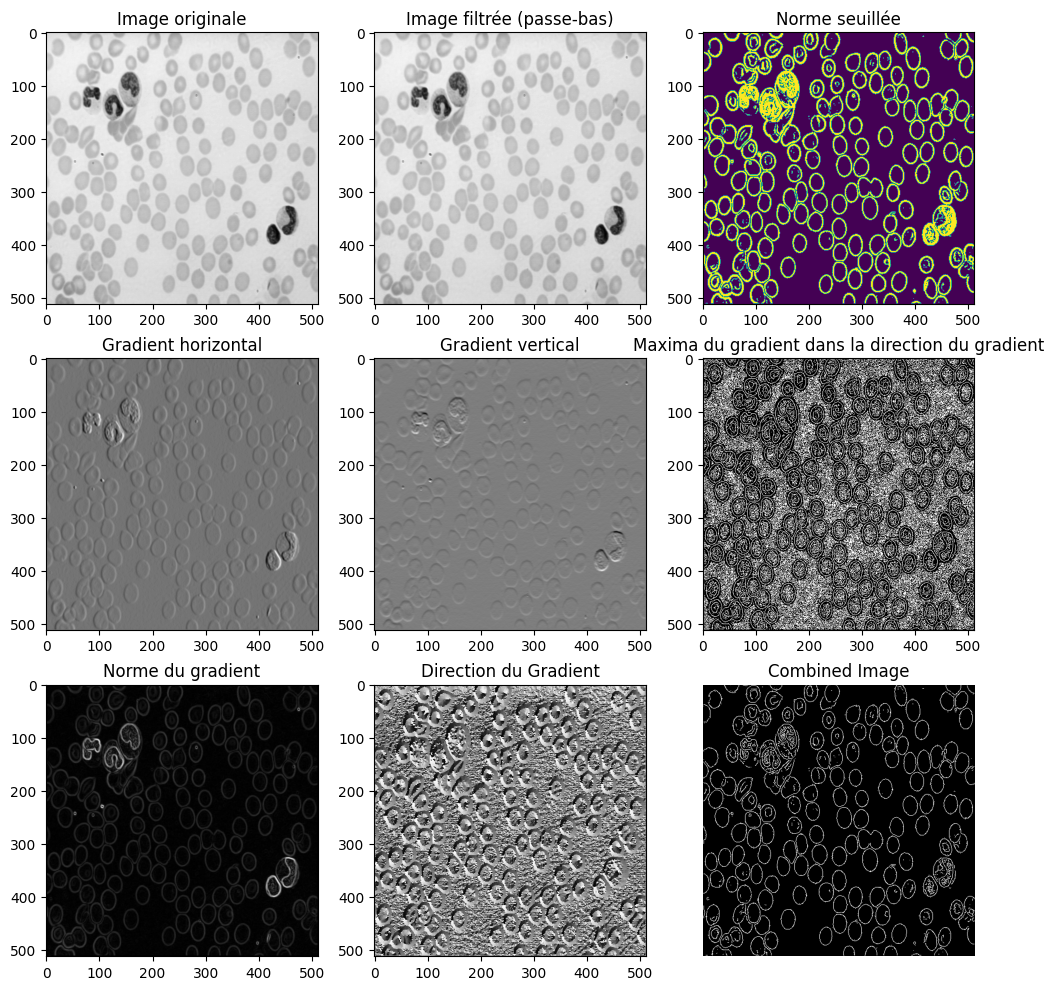

In [53]:
fig, ax = plt.subplots(3, 3, figsize=(12, 12))

gfima = filters.gaussian(ima, sigma)

ax[0, 0].imshow(ima, cmap='gray')
ax[0, 0].set_title('Image originale')

ax[0, 1].imshow(gfima, cmap='gray')
ax[0, 1].set_title('Image filtrée (passe-bas)')

gradx = mr.sobelGradX(gfima)
grady = mr.sobelGradY(gfima)

ax[1, 0].imshow(gradx, cmap='gray')
ax[1, 0].set_title('Gradient horizontal')

ax[1, 1].imshow(grady, cmap='gray')
ax[1, 1].set_title('Gradient vertical')

norme = np.sqrt(gradx * gradx + grady * grady)

ax[2, 0].imshow(norme, cmap='gray')
ax[2, 0].set_title('Norme du gradient')

direction = np.arctan2(grady, gradx)

ax[2, 1].imshow(direction, cmap='gray')
ax[2, 1].set_title('Direction du Gradient')

contoursnorme = (norme > seuilnorme)

ax[0, 2].imshow(255 * contoursnorme)
ax[0, 2].set_title('Norme seuillée')

contours = np.uint8(mr.maximaDirectionGradient(gradx, grady))

ax[1, 2].imshow(255 * contours, cmap='gray')
ax[1, 2].set_title('Maxima du gradient dans la direction du gradient')

valcontours = (norme > seuilnorme) * contours

ax[2, 2].imshow(255 * valcontours, cmap='gray')
ax[2, 2].set_title('Combined Image')

# Hide empty subplots
ax[2, 2].axis('off')

plt.show()

In [54]:
#On change le seuil : 


Text(0.5, 1.0, 'Norme seuillée avec seuil=0.8')

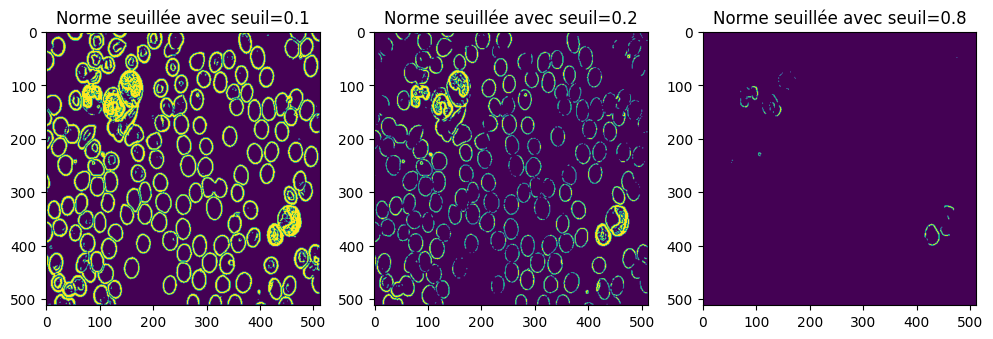

In [55]:
fig, ax = plt.subplots(1, 3, figsize=(12, 12))

contoursnorme = (norme > 0.1)

ax[0].imshow(255 * contoursnorme)
ax[0].set_title('Norme seuillée avec seuil=0.1')

contoursnorme = (norme > 0.2)

ax[1].imshow(255 * contoursnorme)
ax[1].set_title('Norme seuillée avec seuil=0.2')

contoursnorme = (norme > 0.8)

ax[2].imshow(255 * contoursnorme)
ax[2].set_title('Norme seuillée avec seuil=0.8')

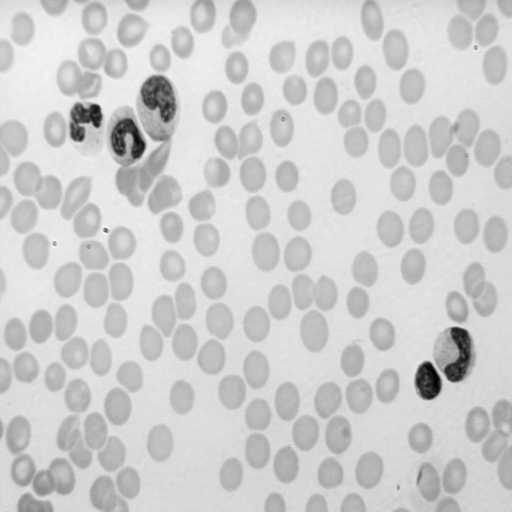

In [56]:
#test de view ima
viewimage(ima)

**Maximum du gradient filtr´e dans la direction du gradient**

In [57]:
alpha=1
seuilnorme=5

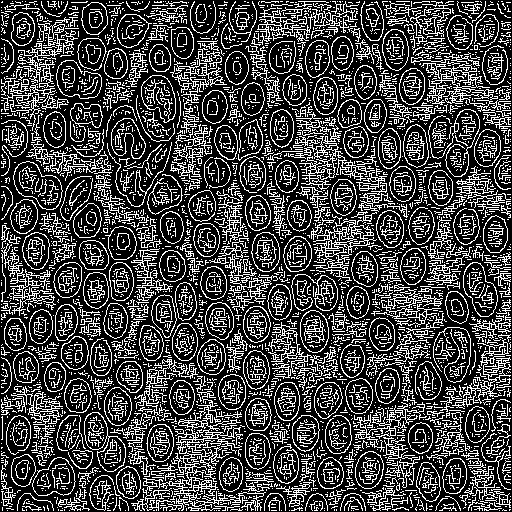

In [58]:
ima=io.imread('cell.tif')
gradx=mr.dericheGradX(mr.dericheSmoothY(ima,alpha),alpha)
grady=mr.dericheGradY(mr.dericheSmoothX(ima,alpha),alpha)  
viewimage(mr.maximaDirectionGradient(gradx, grady))

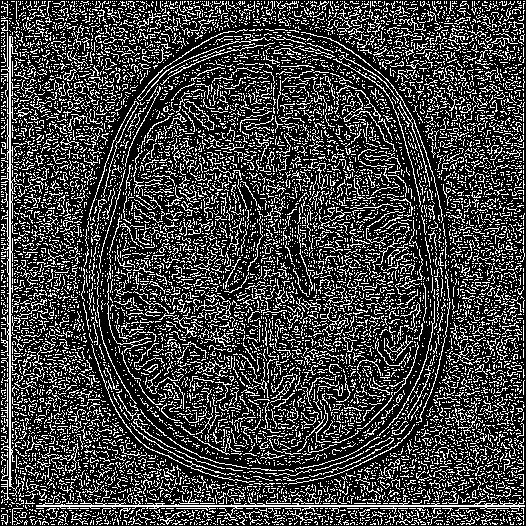

In [59]:
ima=io.imread('cerveau.tif')
gradx=mr.dericheGradX(mr.dericheSmoothY(ima,alpha),alpha)
grady=mr.dericheGradY(mr.dericheSmoothX(ima,alpha),alpha)  
viewimage(mr.maximaDirectionGradient(gradx, grady))

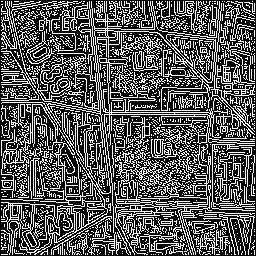

In [60]:
ima=io.imread('carte.tif')
gradx=mr.dericheGradX(mr.dericheSmoothY(ima,alpha),alpha)
grady=mr.dericheGradY(mr.dericheSmoothX(ima,alpha),alpha)  
viewimage(mr.maximaDirectionGradient(gradx, grady))

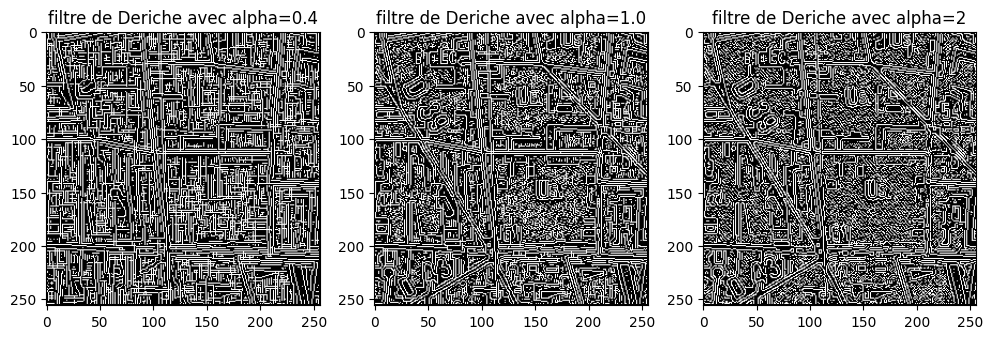

In [61]:
fig, ax = plt.subplots(1, 3, figsize=(12, 12))

i=0
for alpha in [0.4, 1.0, 2] :
    gradx=mr.dericheGradX(mr.dericheSmoothY(ima,alpha),alpha)
    grady=mr.dericheGradY(mr.dericheSmoothX(ima,alpha),alpha)  
    ax[i].imshow(mr.maximaDirectionGradient(gradx, grady), cmap="gray")
    ax[i].set_title('filtre de Deriche avec alpha=' + str(alpha) )
    i+=1
plt.show()


**4-Passage par zéro du laplacien**

**Seuillage avec hysteresis**


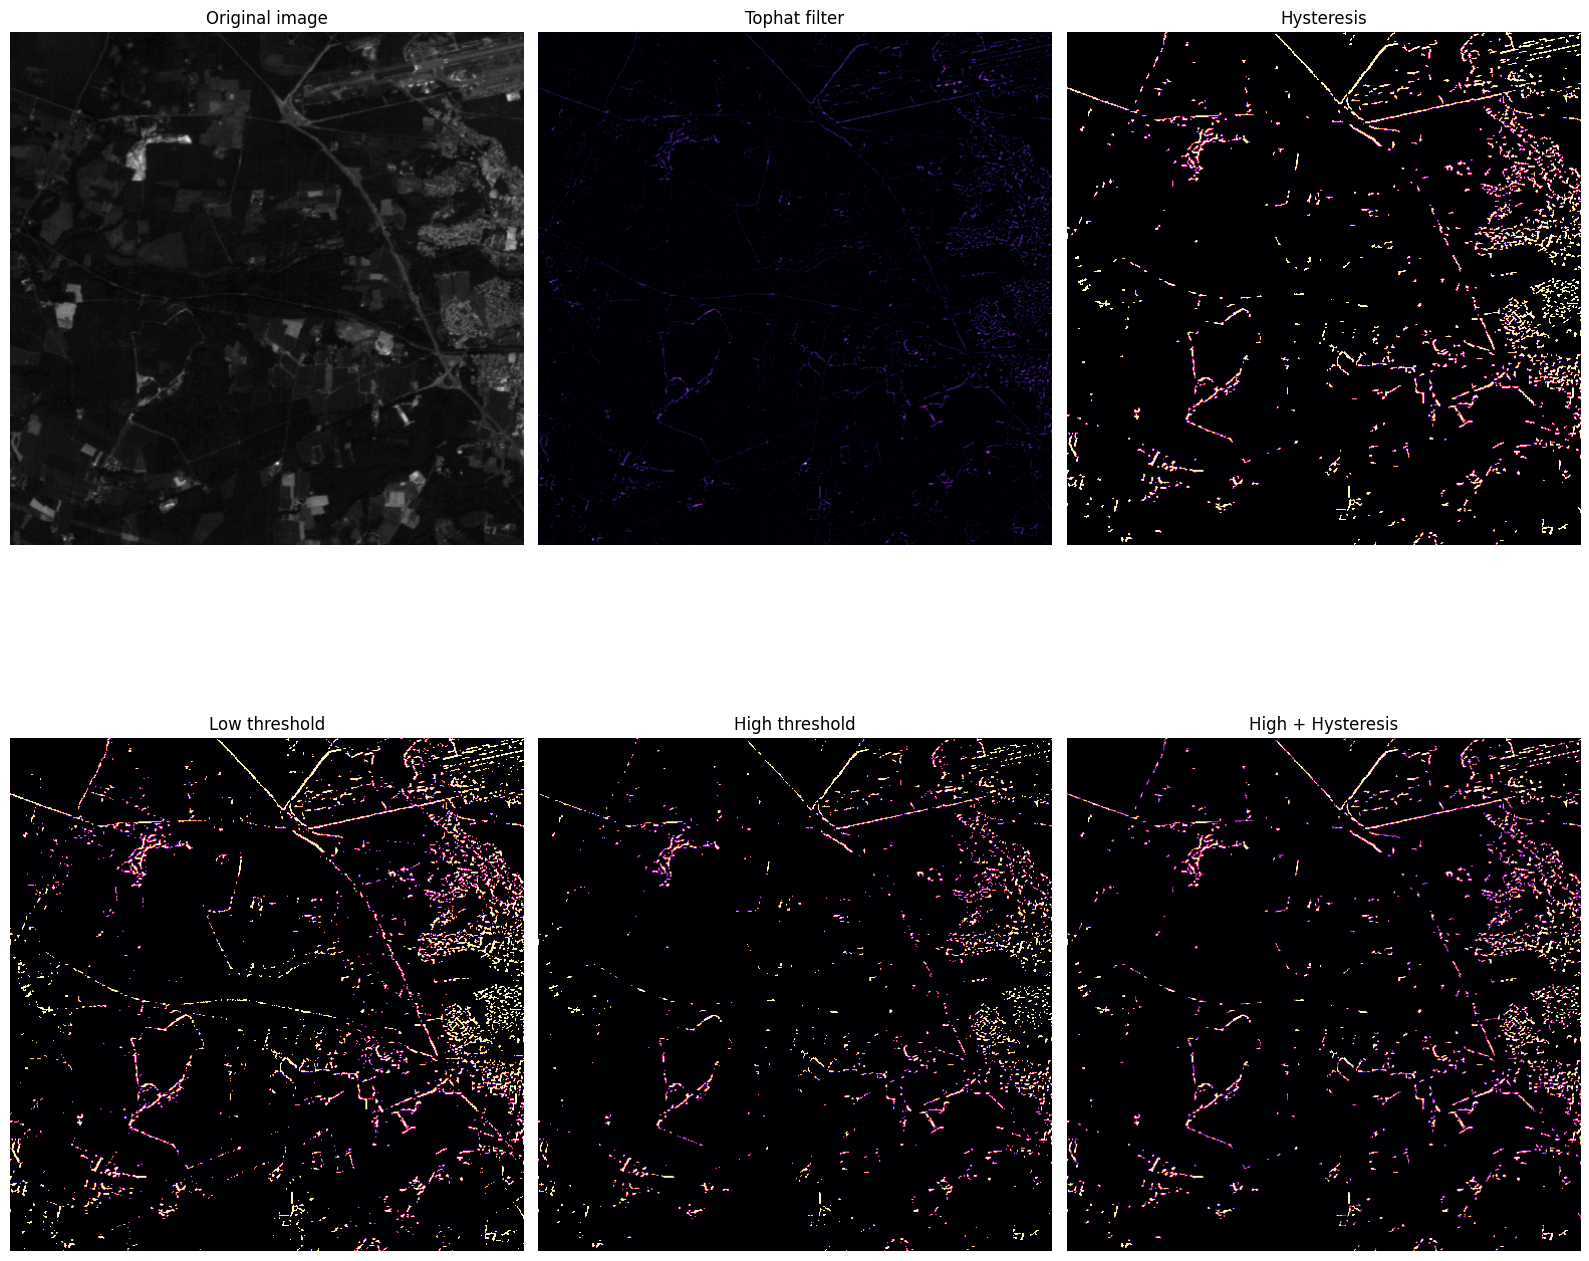

In [62]:
import skimage.morphology as morpho  
import skimage.feature as skf
from scipy import ndimage as ndi
import skimage.io as skio
def tophat(im,rayon):
    se=morpho.square(rayon)
    ero=morpho.erosion(im,se)
    dil=morpho.dilation(ero,se)
    tophat=im-dil
    return tophat
    
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16, 16) )

ima = skio.imread('spot.tif');
rayon=3
top=tophat(ima,rayon)

low = 3
high = 5


lowt = (top > low).astype(int)
hight = (top > high).astype(int)
hyst = filters.apply_hysteresis_threshold(top, low, high)


ax[0, 0].imshow(ima, cmap='gray')
ax[0, 0].set_title('Original image')

ax[0, 1].imshow(top, cmap='magma')
ax[0, 1].set_title('Tophat filter')

ax[1, 0].imshow(lowt, cmap='magma')
ax[1, 0].set_title('Low threshold')

ax[1, 1].imshow(hight, cmap='magma')
ax[1, 1].set_title('High threshold')

ax[0, 2].imshow(hyst, cmap='magma')
ax[0, 2].set_title('Hysteresis')

ax[1, 2].imshow(hight + hyst, cmap='magma')
ax[1, 2].set_title('High + Hysteresis')

for a in ax.ravel():
    a.axis('off')

plt.tight_layout()

plt.show()


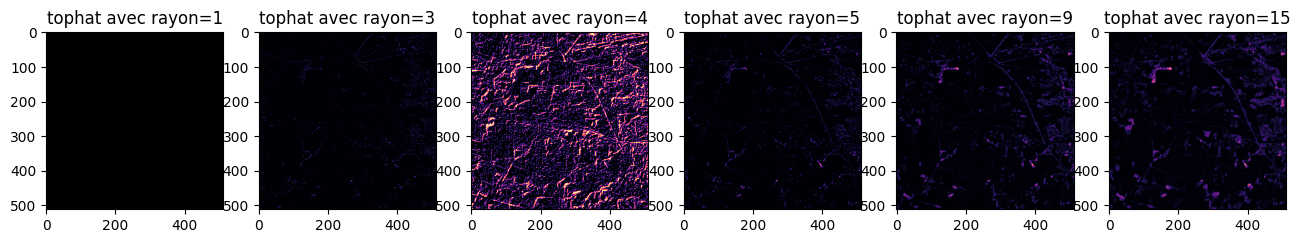

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(16, 16) )

ima = skio.imread('spot.tif');
i=0
for r in [1,3, 4, 5, 9, 15]:
    top=tophat(ima,r)
    ax[i].imshow(top , cmap='magma')
    ax[i].set_title('tophat avec rayon=' + str(r) )
    i+=1

plt.show()